# Практична робота № 5
# Тема. Графи. Ациклічні графи
# Мета: набути практичних навичок розв’язання задач топографічного сортування та оцінювання їх асимптотичної складності.


**Дано ациклічний орієнтований граф**
* **Вершини: {1, 2, 3, 4, 5}**
* **Ребра: {(1,2), (1,3), (2,4), (3,5), (4,5)}**


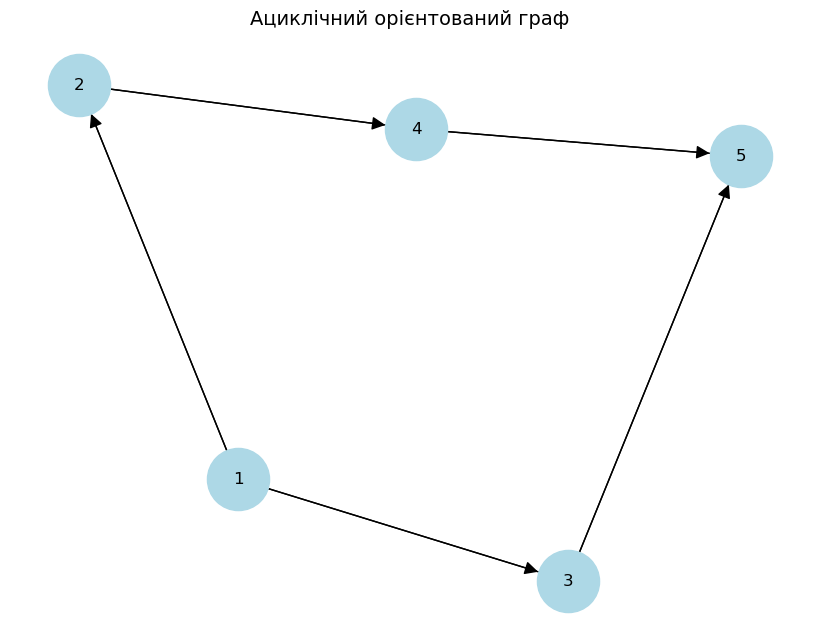

Топологічне сортування (алгоритм Кана):
1 → 2 → 3 → 4 → 5


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Вершини і ребра графа
nodes = [1, 2, 3, 4, 5]
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)]

# Побудова орієнтованого графа
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# --- Візуалізація ---
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, arrowsize=20)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.title("Ациклічний орієнтований граф", fontsize=14)
plt.show()

# --- Алгоритм Кана для топологічного сортування ---
# Обчислюємо вхідні степені (in-degree)
in_degree = {u: 0 for u in G.nodes()}
for u, v in G.edges():
    in_degree[v] += 1

# Черга з вузлів без вхідних ребер
queue = deque([u for u in G.nodes() if in_degree[u] == 0])

topo_order = []

while queue:
    u = queue.popleft()
    topo_order.append(u)
    
    for v in G.successors(u):
        in_degree[v] -= 1
        if in_degree[v] == 0:
            queue.append(v)

# Перевірка на цикли
if len(topo_order) != len(G.nodes()):
    print("У графі є цикл! Топологічне сортування неможливе.")
else:
    print("Топологічне сортування (алгоритм Кана):")
    print(" → ".join(map(str, topo_order)))


# Контрольні питання


# Які переваги і недоліки алгоритму Кана порівняно з алгоритмом DFS для топологічного сортування графа?
**Алгоритм Кана зручний тим, що його легко реалізувати без рекурсії, і він одразу виявляє цикли. Він працює по черзі, завжди обробляючи вершини без вхідних ребер.
Алгоритм DFS базується на рекурсивному обході в глибину, а потім додає вершини у зворотному порядку. Він трохи простіший у коді, але складніше працює з циклами, особливо коли треба виявити їх.
Кан краще підходить для паралельної обробки, а DFS — для швидкого виконання в простих випадках.**

# 2. Яка складність часу і пам’яті для кожного з алгоритмів у найгіршому і найкращому випадках?
**Обидва алгоритми — і Кан, і DFS — працюють приблизно однаково швидко. У найгіршому випадку вони проходять усі вершини та всі ребра, тому час роботи — лінійний від кількості елементів у графі.
Пам’яті вони споживають також небагато, але DFS може потребувати додаткову пам’ять через рекурсію, особливо на великих графах.**

# 3. Чи можна застосовувати алгоритм Кана до графів з вагами на ребрах? Як це порівняти з DFS?
**Так, можна. Але і алгоритм Кана, і DFS не використовують ваги ребер у процесі топологічного сортування. Їм важливо лише, які вершини зв’язані, а не скільки важить зв’язок.
Якщо задача пов'язана з вагами, наприклад, потрібно знайти найдовший шлях у DAG, то після сортування вже застосовують інші методи.**

# 4. Як впливає структура графа на швидкість роботи кожного з цих алгоритмів?
**Якщо граф має багато гілок або вузлів без вхідних ребер, Кан працює швидко, бо може обробляти одразу кілька вершин.
DFS трохи сповільнюється, якщо граф глибокий, бо занурюється в довгі ланцюги і використовує стек.
В обох випадках, якщо граф щільний або має багато ребер, то швидкість знижується, бо кожне ребро потрібно перевірити.**

# 5. Чи є обмеження використання кожного алгоритму для певних типів графів або завдань?
**Так, обидва алгоритми працюють тільки з орієнтованими ациклічними графами (DAG).
Якщо в графі є цикл, жоден з них не зможе виконати топологічне сортування.
Кан краще підходить, якщо потрібно виявити цикл одразу. DFS не дає такого чіткого сигналу — цикл можна пропустити, якщо не перевіряти спеціально.**

# 6. Які варіанти оптимізації можна застосувати для кожного алгоритму з метою поліпшення його продуктивності?
**У Кана можна покращити продуктивність, якщо використовувати пріоритетну чергу і обробляти вершини в певному порядку.
Також, якщо граф великий, то обробку можна розпаралелити — наприклад, брати кілька вершин без вхідних ребер одночасно.
У DFS можна оптимізувати код, якщо обмежити глибину пошуку або кешувати вже пройдені вершини.
Але обидва алгоритми вже досить ефективні і підходять для більшості задач без додаткових покращень.**

